# Numerical Integration

As we discussed during the week, differentiation is the technical and always manageable task. In the same time calculation of the definite integral by the **fundamental theorem of calculus** requires _integrability in elementary functions_ (which is not guaranteed at all).

Thus the closest one can get to the estimation of such integral is **numerical approximation**.

We propose you to try yourself in this task following our instructions.

## Quick refresher

Assume that we have some nice smooth function $f(x)$ on a segment $[a,b]$.

To compute definite integral, one should consider tagged partition of the segment:
$$
a=x_0<x_1<x_2<\ldots<x_n=b
$$
with tagging $t_i \in [x_{i-1}, x_i]$. We assume uniform grid:
$$
x_i-x_{i-1}=h
$$
Then Riemann sum is an approximation of the integral:
$$
R(t, h)=\sum_{i=1}^n f(t_i) (x_i-x_{i-1})=h \sum_{i=1}^n f(t_i)
$$

![](pic12.png)

### Task 1. Midpoint rule

Let us start with basic imports: we start with `numpy` and `math` to work with arrays and mathematical functions (for `numpy` introduction and playground you can refer to the last week of our course or your Python course):

In [1]:
import numpy as np
from math import *

Also we import and setup a couple of plotting libraries to make life prettier:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette('cubehelix')

%matplotlib inline

Now we ask you to implement midpoint rule:

![](pic13.png)

In other words: 
$$
t_i=\frac{x_{i-1}+x_i}{2}
$$
$$
\int_a^b f(x)dx \approx \frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) 
$$

Write the function
```
def middle(f, a, b, n):
```
that takes as an input function `f` and returns the Riemann sum by midpoint rule:

In [3]:
def middle(f, a, b, n):
    # your code goes here
    f = np.vectorize(f)
    dx = (b - a) / n
    x_mid = np.linspace(dx/2, b - dx/2, n)
    I = np.sum(f(x_mid)) * dx
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [4]:
import checker
checker.exact_checker(middle)

Test 1  |::|  err= 1.00783358958e-05   |::|   time= 0.0001785755157470703 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.000801769309935   |::|   time= 0.00011754035949707031 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 0.00137034476156   |::|   time= 0.0003294944763183594 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 2. Plot the result

Let us also plot a nice picture here. Consider $f(x)=\cos(x)$, $[a,b]=[0, \pi/2]$ and $n=10$. Plot the functions, midpoints, and corresponding reactangles (it is useful to use command `plt.bar`). You should get something like this: 

![](res.png)

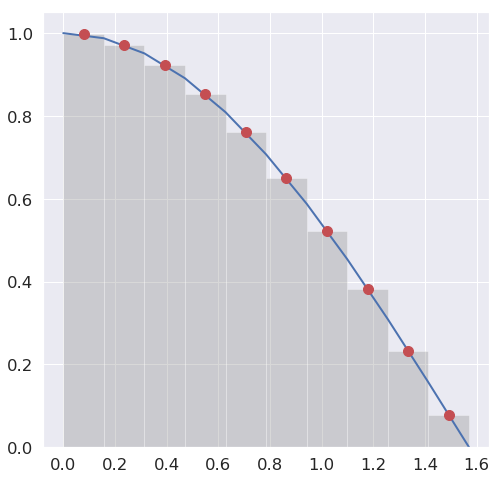

In [5]:
f = lambda x: np.cos(x)
a = 0
b = np.pi / 2
n = 10

x = np.linspace(a, b, n + 1)
y = f(x)

plt.figure(figsize=(8,8))

plt.plot(x, y, 'b')
x_mid = (x[:-1] + x[1:]) / 2
y_mid = f(x_mid)
plt.plot(x_mid, y_mid, 'r.',markersize=20)
plt.bar(x_mid, y_mid, width=(b-a)/n, color='grey', alpha=.3)

plt.show()

### Task 3. Trapezoidal rule

The idea here is easily formulated by the picture:
![](pic11.png)
We approximate each segment with trapezoidal area:
$$
\int_a^b f(x)dx=\frac{b-a}{n}\sum_{i=1}^{n} \frac{f(x_{i-1})+f(x_i)}{2}=\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)
$$
(basically we use the formula for the area of trapezoidal polygon $S=h\cdot(x+y)/2$ where $h$ is the height of the figure and $x$ and $y$ are lengths of parallel sides).

Write the implementation of the formula:

In [6]:
def trapezoidal(f, a, b, n):
    # your code goes here
    f = np.vectorize(f)
    x = np.linspace(a, b, n + 1)
    dx = (b - a) / n
    y = f(x)
    y_right = y[1:] # right endpoints
    y_left = y[:-1] # left endpoints
    I = dx / 2 * np.sum(y_right + y_left)
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [7]:
checker.exact_checker(trapezoidal)

Test 1  |::|  err= 2.01566108483e-05   |::|   time= 0.00026607513427734375 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.00140986862456   |::|   time= 0.00019502639770507812 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 4.75384852838e-06   |::|   time= 0.0002155303955078125 s
Test 3  |::|  accuracy OK
Passed:  3 /3


### Task 4. Simpson's rule

To proceed with the Simpson's rule, we need to improve on the general idea of Riemann sum approximation. Assume the restriction of the function on a segement $[x_{i-1}, x_i]$: instead of using the definition, one could try to approximate given function by one simpler and easier to integrate. 

Simpson's rule uses approximation by the parabolic function per each segment. In order to it, one needs **three** points -- e.g., $f(x_i)$, $f(x_{i+1}$ and $f\left(\frac{x_{i}+x_{i+1}}{2} \right)$ (the general function is described by $ax^2+bx+c$ with three parameters; following linear algebra's _Rank theorem_, one would need at least three linarly independent equations to find those parameters).
![](pic14.png)
Then approximation can be written as follows:
$$
\int_a^b f(x)dx=\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)
$$

Write the implementation of the formula. 

**Note**: the commulitive formula will work for odd $n$ only, that's fine! (It doesn't mean that in the even case Simpson's rule is inadequate; it is just unpleasant to implement).

In [8]:
def simpson(f, a, b, n):
    #your code goes here
    if n % 2 == 1:
        n -= 1
    f = np.vectorize(f)
    x = np.linspace(a, b, n + 1)
    dx = (b - a) / n
    y = f(x)
    I = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    
    return I

Run the following cell to get automatic basic check of your function (do not change it!):

In [9]:
checker.exact_checker(simpson)

Test 1  |::|  err= 3.38235883746e-10   |::|   time= 0.00018787384033203125 s
Test 1  |::|  accuracy OK
Test 2  |::|  err= 0.00102876670228   |::|   time= 0.00012445449829101562 s
Test 2  |::|  accuracy OK
Test 3  |::|  err= 8.02223734109e-08   |::|   time= 0.0006873607635498047 s
Test 3  |::|  accuracy OK
Passed:  3 /3


## Error estimations

Using **Taylor expansion** of the integrand function, one can establish following estimates of the global errors of the numerical methods.

| **Method** |  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  **Formula**   &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;        | **Error**  |&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;     **Constant**    &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  |
|---|:--------------------------:|---|---------|
| _Middle Point_  | $\frac{b-a}{n}\sum_{i=1}^n f\left( \frac{x_{i-1}+x_i}{2} \right) $  |  $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Trapezoidal_  | $\frac{b-a}{n}\left(\frac{f(a)+f(b)}{2}+\sum_{i=1}^{n-1} f(x_i)\right)$ | $\frac{(b-a)^3}{12n^2}C$  | $\max_{[a,b]} |f^{(2)}(x)|$ |
| _Simpson's rule_  | $\frac{b-a}{3n}\left(\sum_{i=1}^{[n/2]} f(x_{2i-2})+4f(x_{2i-1})+f(x_{2i})\right)$ | $\frac{(b-a)^5}{180n^4}C $  | $\max_{[a,b]} |f^{(4)}(x)|$  |

Let us check this formula in terms of adequacy for both included derivative and order of the $n$.

### Task 5. Error and the derivative

Assume $[a,b]=[0,1]$ and $n=100$. Consider the function $f(x)=e^{ax}$ with varying $a$.
1. Compute exact value of the integral $\int_0^1 e^{ax} dx$ analytically (variable `exact`)
2. Compute and plot errors for **trapezoidal rule** with respect to $a$:

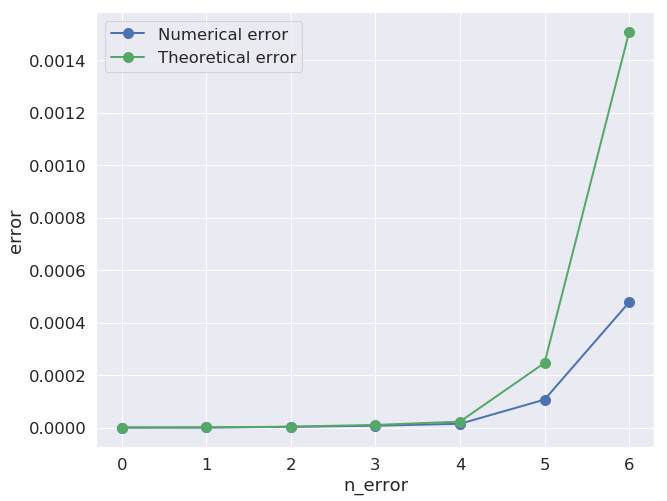

In [10]:
coefs = [0.1, 0.2, 0.5, 0.75, 1.0, 2.0, 3.0]
errs = []
theo_errs = []

a = 0
b = 1
n = 100

for i in coefs:
    #your code goes here
    f = lambda x: np.exp(i * x)
    exact = (np.exp(i) - 1) / i
    I = trapezoidal(f, a, b, n)
    err = np.abs(exact - I)
    errs.append(err)
    
    # theoretical error
    x = np.linspace(a, b, n + 1)
    deriv = lambda x: i**2 * np.exp(i * x)
    C = max(abs(deriv(x)))
    theo_err = (b - a)**3 / (12*n**2) * C
    theo_errs.append(theo_err)
    
plt.figure(figsize=(10,8))
plt.plot(errs, '-b', marker='o', markersize=10, label='Numerical error')
plt.plot(theo_errs, '-g', marker='o', markersize=10, label='Theoretical error')
plt.xlabel('n_error')
plt.ylabel('error')
plt.legend()
plt.show()

### Task 6. Error and number of steps

Assume $[a,b]=[0,\pi/2]$. Consider the function $f(x)=\sin{x}$.
1. Compute exact value of the integral $\int_0^{\pi/2} \sin{x} dx$ analytically (variable `exact`)
2. Compute and plot errors for different values of $n$ for **all three methods**:

[]

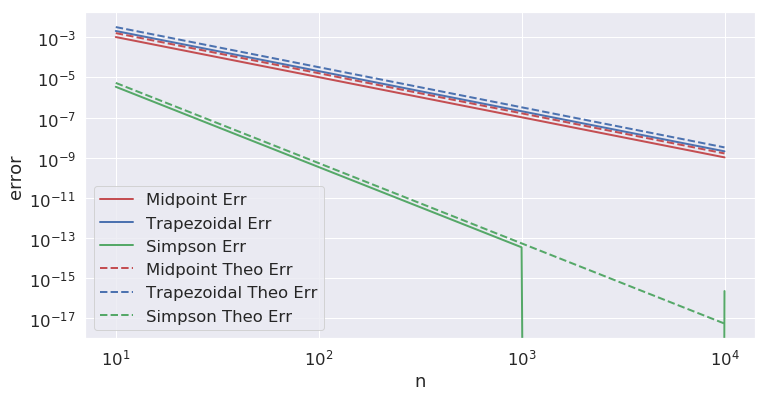

In [11]:
ns = [10, 50, 100, 500, 1000, 5000, 10000]
errs_mp = []
errs_mp_theo = []
errs_trap = []
errs_trap_theo = []
errs_simp = []
errs_simp_theo = []

exact = 1
f = lambda x: np.sin(x)
a = 0; b = np.pi/2

for n in ns:
    x = np.linspace(a, b, n + 1)
    
    # numerical
    I = middle(f, a, b, n)
    errs_mp.append(np.abs(exact - I))
    # theoretical
    C = max(abs(-np.sin(x)))  # given that the second derivative of sin(x) is -sin(x)
    theo_err = (b - a)**3 / (24 * n**2) * C
    errs_mp_theo.append(theo_err)
    
    # numerical
    I = trapezoidal(f, a, b, n)
    errs_trap.append(np.abs(exact - I))
    # theoretical
    C = max(abs(-np.sin(x)))
    theo_err = (b - a)**3 / (12 * n**2) * C
    errs_trap_theo.append(theo_err)
    
    # numerical
    I = simpson(f, a, b, n)
    errs_simp.append(np.abs(exact - I))
    # theoretical
    C = max(abs(f(x)))  # given that the fourth derivative of sin(x) is sin(x)
    theo_err = (b - a)**5 / (180 * n**4) * C
    errs_simp_theo.append(theo_err)
    
    
plt.figure(figsize=(12,6))

plt.loglog(ns, errs_mp, '-r', label='Midpoint Err')
plt.loglog(ns, errs_trap, '-b', label='Trapezoidal Err')
plt.loglog(ns, errs_simp, '-g', label='Simpson Err')

plt.loglog(ns, errs_mp_theo, '--r', label='Midpoint Theo Err')
plt.loglog(ns, errs_trap_theo, '--b', label='Trapezoidal Theo Err')
plt.loglog(ns, errs_simp_theo, '--g', label='Simpson Theo Err')

plt.legend()
plt.xlabel('n')
plt.ylabel('error')
plt.plot()

Additional: comparing errors for the function $x^x$ for $[a,b]=[0, 1]$ and $n=100$.

In [12]:
a = 0; b = 1
n = 100
f = lambda x: x**x

exact = 0.783431  # approximately

mp_err = np.abs(exact - middle(f, a, b, n))
trap_err = np.abs(exact - trapezoidal(f, a, b, n))
simp_err = np.abs(exact - simpson(f, a, b, n))

print('Midpoint error is: {}'.format(mp_err))
print('Trapezoidal error is: {}'.format(trap_err))
print('Simpson error is: {}'.format(simp_err))

Midpoint error is: 2.9101286613930633e-05
Trapezoidal error is: 6.258790255042612e-05
Simpson error is: 7.389761213727475e-06


## Task 7. Results

Answer following questions in the field below:
1. By comparing three method which one is best to use for the function $x^x$?
2. Does estimations of error for $e^{ax}$ coincide with theoretical upper boundary per $a$? If not, where is the problem?
3. Does estimations of error for $\sin {x}$ coincide with theoretical upper boundary per $n$? If not, where is the problem?

1. We can clearly see that for such complex function as $x^x$, Simpson's method gives the best estimate.

2. As we can see for small values of $a$ numerical and theoretical errors optically coincide. However, when $a$ starts increasing, numerical error stays well below the theoretical upper boundary. 

3. We can see that numerical errors estimations are staying below the theoretical upper boundaries per $n$. 
